# Optimization for Machine Learning, lecture 3 - 02/02/2021

In [1]:
from IPython.display import Image

## Recap

$w_{k+1} = w_k -\alpha.g(w_k, \zeta_k)$

$g(w_k, \zeta_k)=\frac{1}{n_k}.\overset{n}{\underset{i=1}{\sum}}\nabla f(w_k, \zeta_k)$

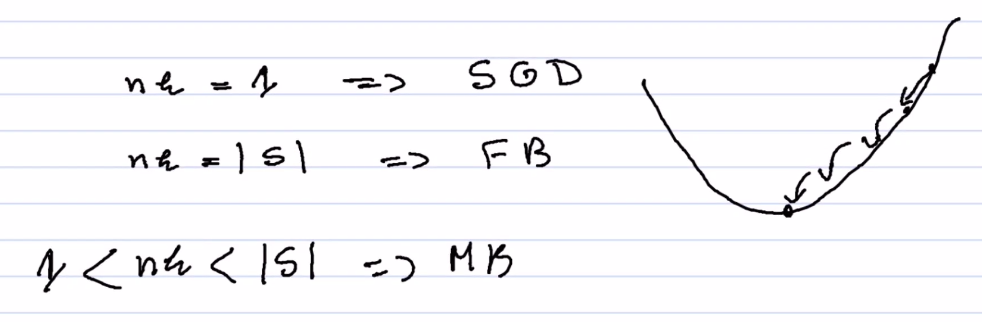

In [2]:
Image('pictures/recap.png', width=600)

## Assumptions

We say F is L-smooth or the gradient of F is Lipschitz-continuous if:

> $||\nabla F(x) - \nabla f(y)|| \le L||x-y||$ with $||.||$ the euclidian norm such that $||x|| = \sqrt{\sum x_i^2}$

i.e. the gradient cannot be too large. 

**This implies that: $F(y) \le F(x) + \nabla F(x)^T(y-x) + \frac{L}{2}.||y-x||^2$**

- $F(x)$ constant
- $\nabla F(x)^T(y-x)$ linear term
- $\frac{L}{2}.||y-x||^2$ quadratic term

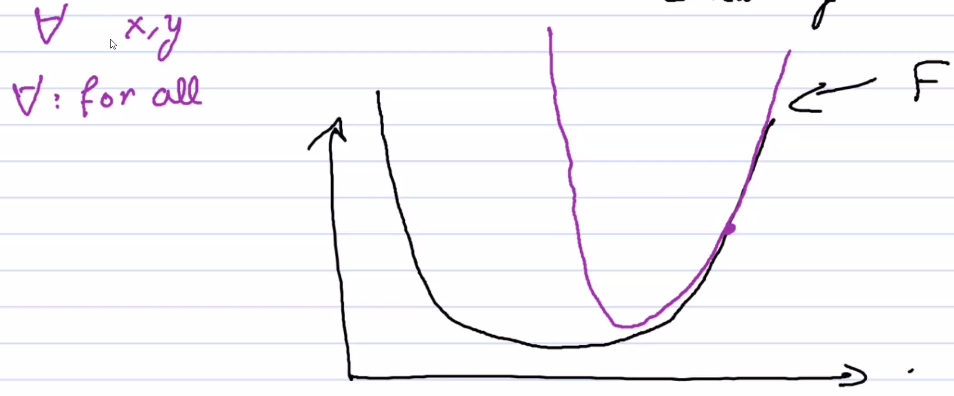

In [3]:
Image('pictures/quadratic_upperbound.png', width=600)

### Lemma 4.2: Average over all the results of the algorithm 

$E_{\zeta_k}[F(w_{k+1})] - F(W_k) \le -\alpha_k.\nabla F(w_k)^T.E_{\zeta_k}[g(w_{k+1,\zeta_k})]+\frac{1}{2}.\alpha_k^2.L.E_{\zeta_k}[||g(w_{k+1},\zeta_k)||^2]$

**Proof**:

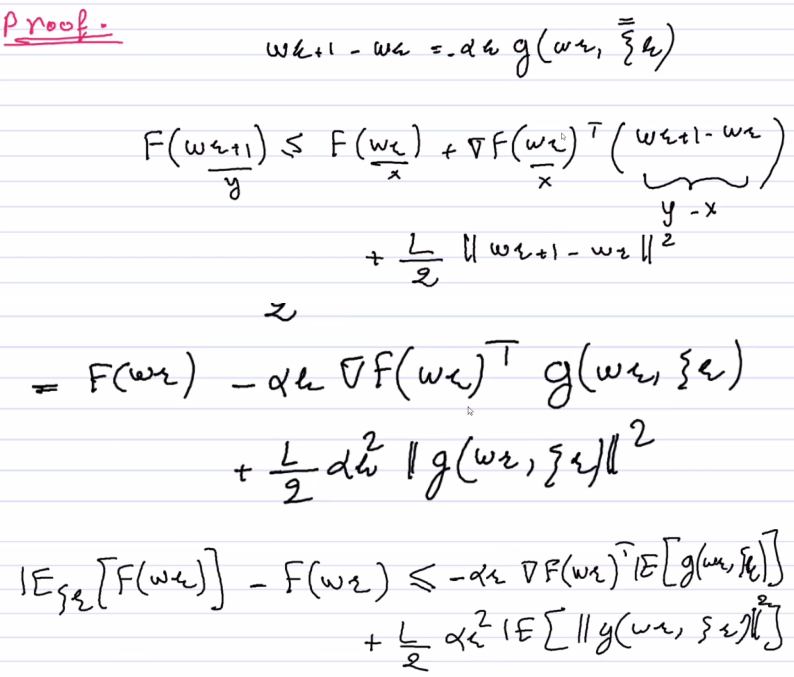

In [5]:
Image('pictures/lemmaproof.png', width=600)

The right-side member is the result of a scalar product ($\quad u^Tv = ||u||.||v||.cos(\theta)\quad$). If u, v are oriented in the same direction then $u^Tv \gt 0$. 

- $E_{\zeta_k}[g(w_k, \zeta_k)]$: should be aligned with $\nabla F$
- $\alpha_k$ should be small enough
- Variance for vectors: $V_{\zeta_k}[g(w_k, \zeta_k)] = E_{\zeta_k}[||g(w_k, \zeta_k)||^2] - ||E_{\zeta_k}[g(w_k, \zeta_k)]||^2$ as $V(X) = E(X^2) - E(X)^2$

We can upperbound the variance.

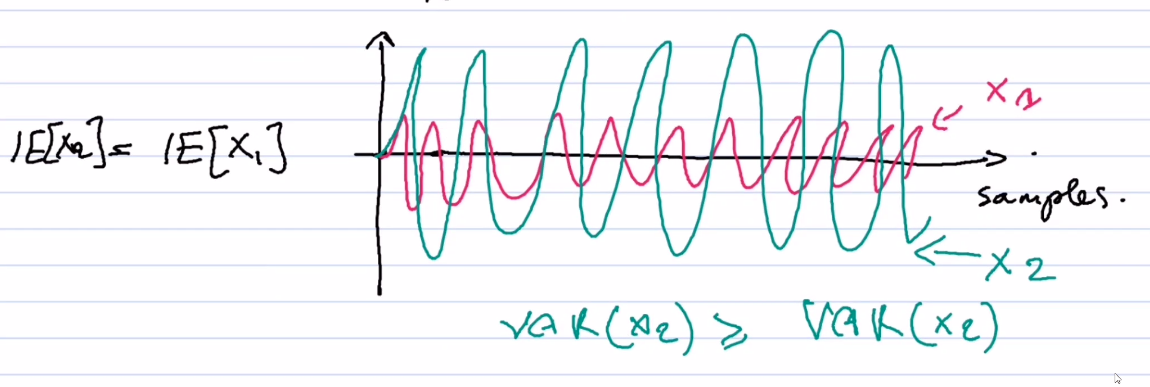

In [6]:
Image('pictures/variance_vector.png', width=600)

### Assumption 4.3

1. **technical**: $\exists$  open set $I$ containng all sequences $\{w_k\}$.  F is bounded below by $F_{inf}$ (F has a lowerbound)

2. $\exists \mu_g \gt \mu \gt 0$ such that $\forall k\in \mathbb{N}$ with $\mu_g$ and $\mu$ two arbitrary constants:

$$\nabla F^T(w_k).E[g(w_k, \zeta_k)] \ge \mu.||\nabla F^T(w_k)||^2$$

$$E[g(w_k, \zeta_k)] \le \mu_g.||\nabla F^T(w_k)||$$

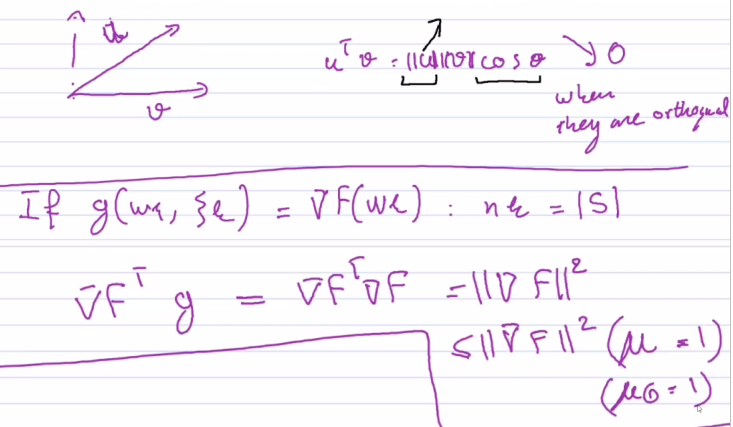

In [7]:
Image('pictures/assumptionb.png', width=600)

3. $V_{\zeta_k} [g(w_k, \zeta_k)] \le M + M.v.||\nabla F(w_k)||^2$. If $w^*$ is at the critical region ($\nabla F(w^*)=0$) then $V_{\zeta_k} [g(w_k, \zeta_k)] \le M$ with $M$ a constant variability at critical region.

**Recap**: We introduced:

- L-smoothness on F (Lipschitz-continuity of $\nabla F$)
- $\mu, \mu_g$ alignments constants, and $M, Mv$ noise constants

$E[||g||^2] = V[g] - ||E[g]||^2$

$E[||g||^2] \le M+M_v||\nabla F||^2 + \mu_g^2||\nabla F||^2$

$E[||g||^2] \le M+M_g||\nabla F||^2$ with $M_g = M_v+\mu_g^2$

### Lemma 4.4

Under assumptions 4.1 and 4.3, we have:

$\forall k \in \mathbb{N}, E_{\zeta_k}[F(w_{k+1})]-F(w_k) \le -(\mu -\frac{1}{2}.\alpha_k.L.M_g).\alpha_k.||\nabla F(w_k)||^2+\frac{1}{2}.\alpha_k^2L.M$

### Proof

$E_{\zeta_k}[F(w_{k+1})] - f(w_k) \le - \alpha_k.\nabla F^T . E_{\zeta_k}[g] + \frac{1}{2}.\alpha_k^2.L.E_{\zeta_k}[||g||^2]$ 

- $E_{\zeta_k}[g] \ge \mu.||\nabla F||$

- $E_{\zeta_k}[||g||^2] \le M+M_g||\nabla F||$

$E_{\zeta_k}[F(w_{k+1})] - f(w_k) \le -\alpha_k.\mu.||\nabla F||^2 + \frac{1}{2} \alpha^2 M.L. + \frac{1}{2}.\alpha_k^2.L.M_g.||\nabla F||^2$

$E_{\zeta_k}[F(w_{k+1})] - f(w_k) \le -\alpha_k(\mu-\frac{1}{2}.\alpha_k.L.M_g).||\nabla F||^2 + \frac{1}{2}.\alpha_k^2.M.L$

- $\alpha_k \le \frac{\mu}{L.M_g}*2$

$\Rightarrow L$ increases so we need to decrease the learning rate

$\Rightarrow M_g$ increases, and we need a small $\alpha_k$

$\Rightarrow \mu$ increases, $\alpha_k$ increases

### Assumption 4.5. (Strong-Convexity)

For L-Smoothness ($\le$), we have a lower bound $F(y) \ge F(x) + \nabla F(y)^T(y-x).\frac{1}{2}.c.||y-x||^2$ with $c \gt 0$

C-strong convexity (Strictly convex with a constant associated to it) $\Rightarrow$ Convexity.

Instead of a quadratic upperbound, we are looking to find a lowerbound. 

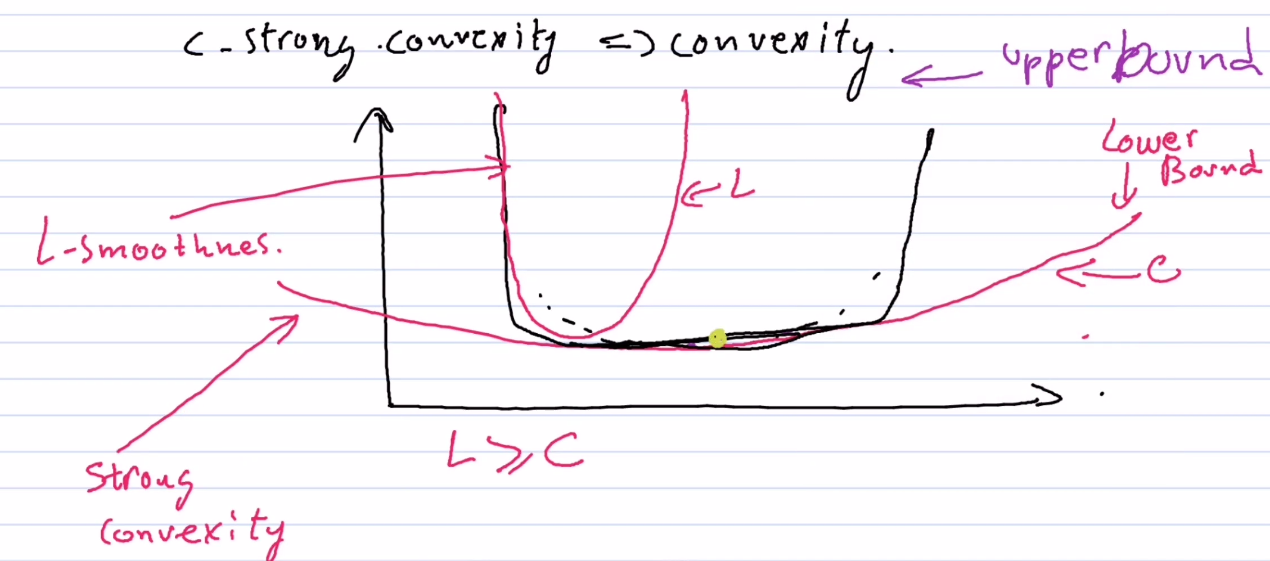

In [9]:
Image('pictures/lowerbound.png', width=600)

**1. The function F should increase at least as fast as the lower bound (quadratic).**

**2. The function F should not increase faster than the upper bound.**

$Q(y) = F(x)$ (goes to zero) $+\nabla F(x)^T) (y-x) +\frac{1}{2}.c.||y-x||^2$

$\nabla y . Q(y) = \nabla F(x) +(y-x).c$

$\nabla_y Q(y^*) = 0 = \nabla F(x) + (y^* - x) . c$

$y^* = \frac{-\nabla F(x)}{c} + x \rightarrow$ minimum of $Q$

$Q(y^*) = F(x) + \nabla F(x)^T.(\frac{-\nabla F(x)}{c}) + \frac{1}{2c}||\nabla F(x)||^2$

$F(x) - F(x^*) \le \frac{1}{2c}.||\nabla F(x)||^2 \leftarrow$ **property** (can tell us how far we are from the optimum)

### Theorem 4.6 (Fixed step size convergence result)

$$\alpha_k = \alpha$$

$\alpha$ is kept constant

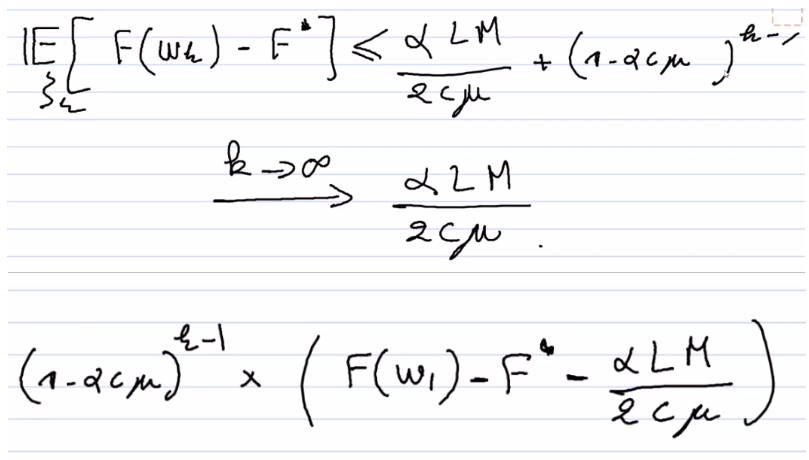

In [10]:
Image('pictures/fixedstep.png', width=600)

$0 \lt \alpha \le \frac{\mu}{L.M_g}$ (2)

### Proof

Use Lemma (4.4) + (1) + (2)

$E_{\zeta_k}[F(w_{k+1})-F(w_k)] \le -(\mu - \frac{1}{2}.\alpha.L.M_g).||\nabla F||^2 + \frac{1}{2}.\alpha^2.L.M$

$E_{\zeta_k}[F(w_{k+1})-F(w_k)] \le -(\mu - \frac{1}{2}.\mu).\alpha.||\nabla F||^2 + \frac{1}{2}.\alpha^2.L.M$

$E_{\zeta_k}[F(w_{k+1})-F(w_k)] \le - \frac{1}{2}.\mu.\alpha.||\nabla F||^2 + \frac{1}{2}.\alpha^2.L.M$

$E_{\zeta_k}[F(w_{k+1})-F(w_k)] \le - \mu.\alpha.c.(F(w_k)-F^*) + \frac{1}{2}.\alpha^2.L.M$

$E_{\zeta_k}[F(w_{k+1})] -F(w_k) \le - \mu.\alpha.c.(F(w_k)-F^*) + \frac{1}{2}.\alpha^2.L.M$ with $\zeta_k$ independent with $\zeta_k-1$

$E_{\zeta_k}[F(w_{k+1})-F^*] \le F(w_k) - F^* - \mu.\alpha.c.(F(w_k)-F^*) + \frac{1}{2}.\alpha^2.L.M$

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le F(w_k) - F^* - \mu.\alpha.c.(F(w_k)-F^*) + \frac{1}{2}.\alpha^2.L.M - \frac{\alpha.L.M}{2.c.\mu} $

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le ... + \frac{1}{2}.\alpha^2.L.M - \frac{\alpha.L.M}{2.c.\mu} $

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le \frac{1}{2}.\alpha^2.L.M.(c.\mu.\alpha-1)$

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le (1-c.\mu.\alpha).(E_{\zeta_k}[F(w_k) - F^*] - \frac{\alpha.L.M}{2.c.\mu})$ at k

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le (1-c.\mu.\alpha)^2.(E_{\zeta_k}[F(w_{k-1}) - F^*] - \frac{\alpha.L.M}{2.c.\mu})$ at k-1

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le (1-c.\mu.\alpha)^k.(E_{\zeta_k}[F(w_{k-(k-1)}) - F^*] - \frac{\alpha.L.M}{2.c.\mu})$ up to k = 1

$E_{\zeta_k}[F(w_{k+1})-F^* - \frac{\alpha.L.M}{2.c.\mu}] \le (1-c.\mu.\alpha)^{k-1}.(E_{\zeta_k}[F(w_{k-(k-1)}) - F^*]) - \frac{\alpha.L.M}{2.c.\mu}$ up to k = 1

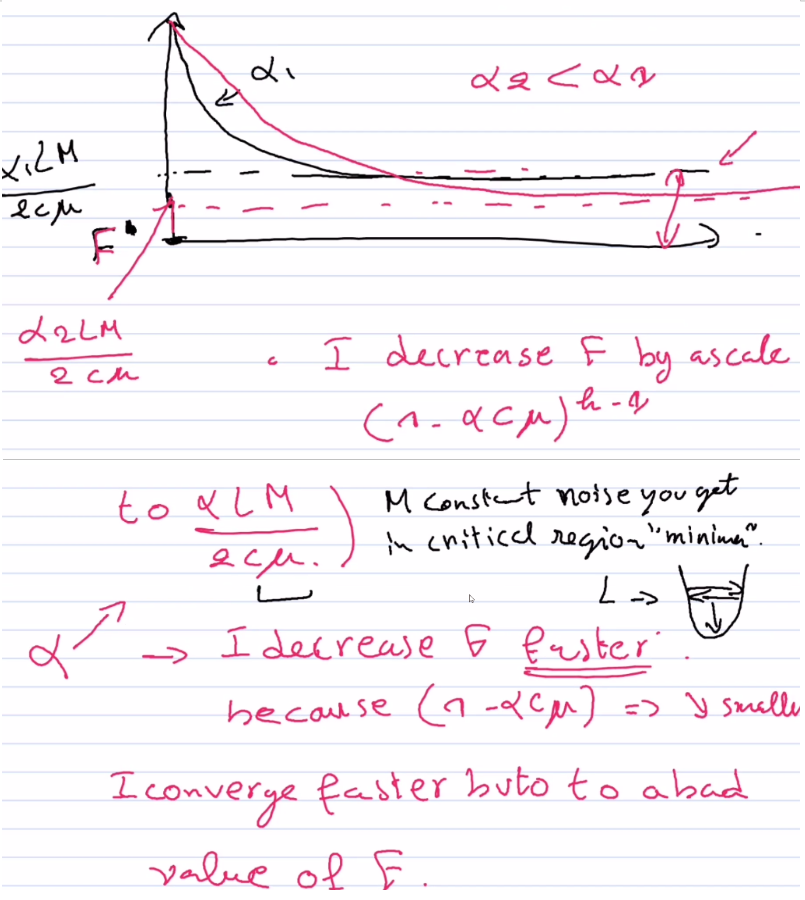

In [11]:
Image('pictures/learningrate.png', width=600)

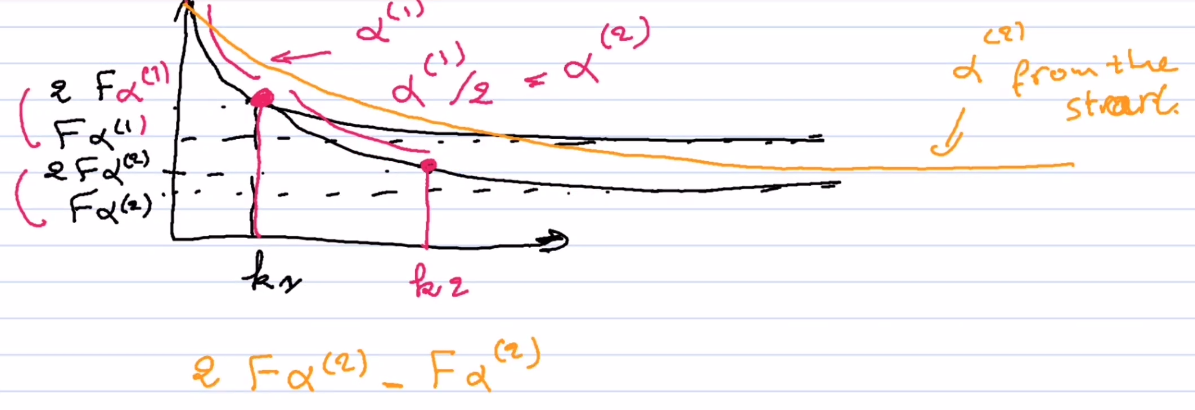

In [13]:
Image('pictures/varyingLR.png', width=600)

$K_i \approx 2^r$

$F_\alpha^{(r)} \approx w^-r$

Decrease F by $\frac{1}{k}$ I need to iterate for $K$ iterations.

$\Rightarrow$ sublinear convergence (eliminates completely the gap between $F^*$ and $F(w_k)$)

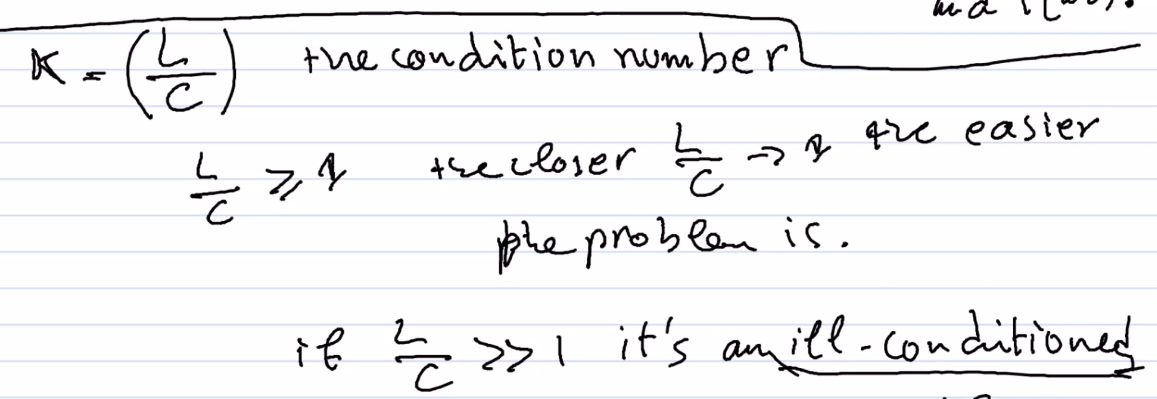

In [15]:
Image('pictures/conditionNumber.png', width=600)